Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection & Analysis

In [2]:
#loading the dataset
big_mart_data = pd.read_csv('/content/ML-Project-12-Big Mart Sales Prediction.csv')

In [3]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
big_mart_data.shape

(8523, 12)

In [5]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

In [7]:
# mean for item weight and mode for outlet size
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [8]:
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace=True)

In [9]:
# replacing the missing values with mode now
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
big_mart_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [11]:
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [14]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

Data Analysis

In [16]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [17]:
sns.set()

<ipython-input-18-231c551d0d18>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


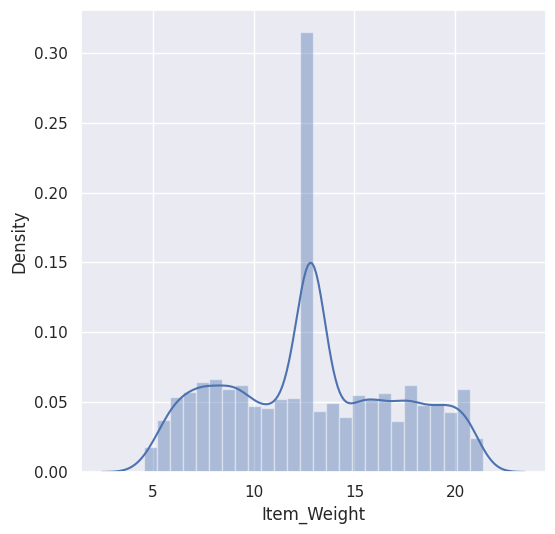

In [18]:
# item_weight_dist
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

<ipython-input-19-e98c5f9434f1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


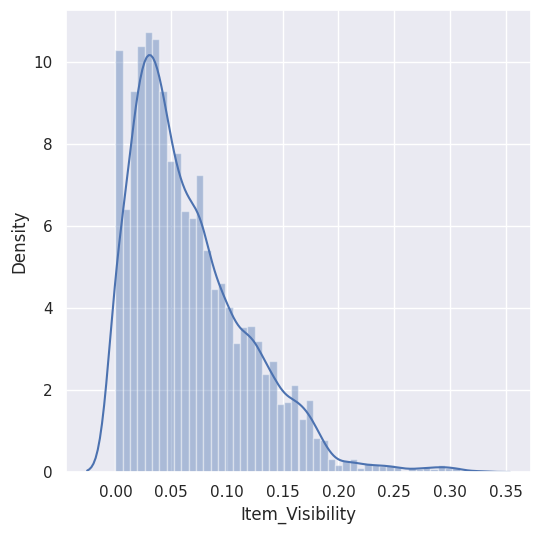

In [19]:
# item_visibility_dist
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

<ipython-input-20-606d4a31efd6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


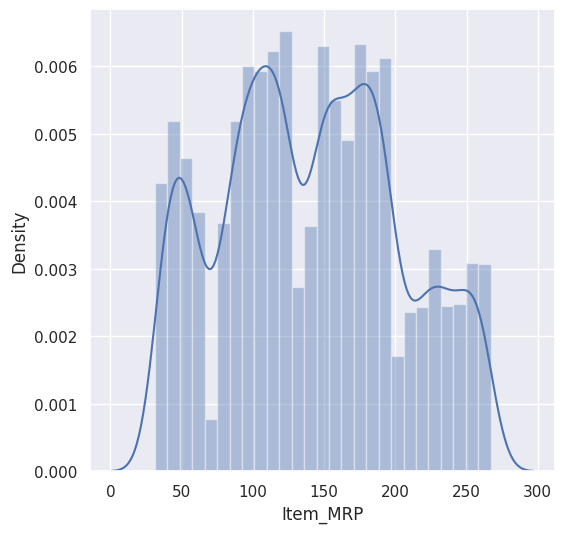

In [20]:
# item_MRP_dist
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-21-bb0ea53525a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


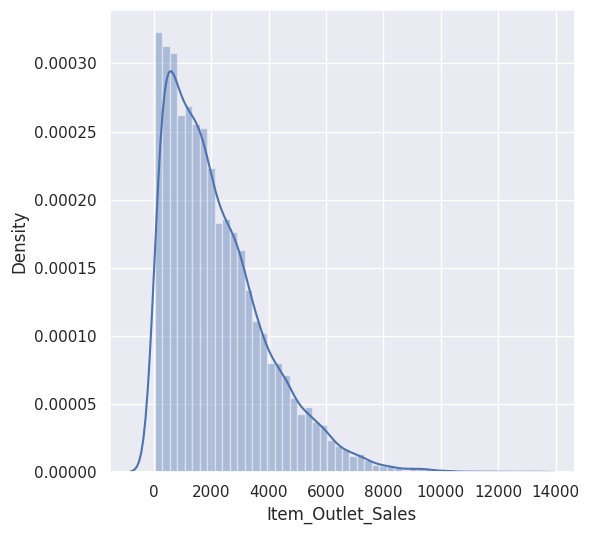

In [21]:
# item_MRP_dist
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

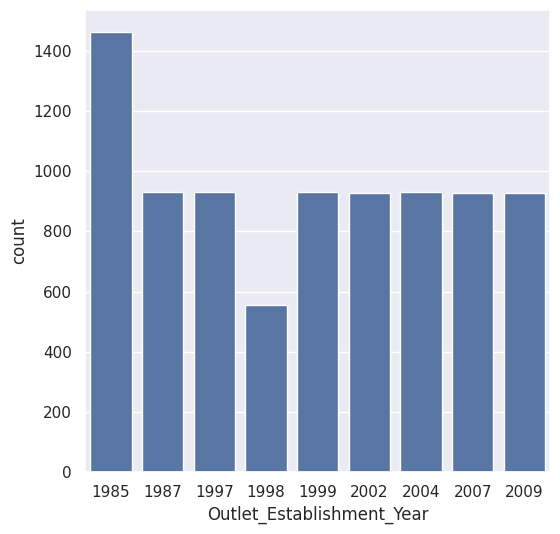

In [22]:
# item_MRP_dist
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data = big_mart_data)
plt.show()

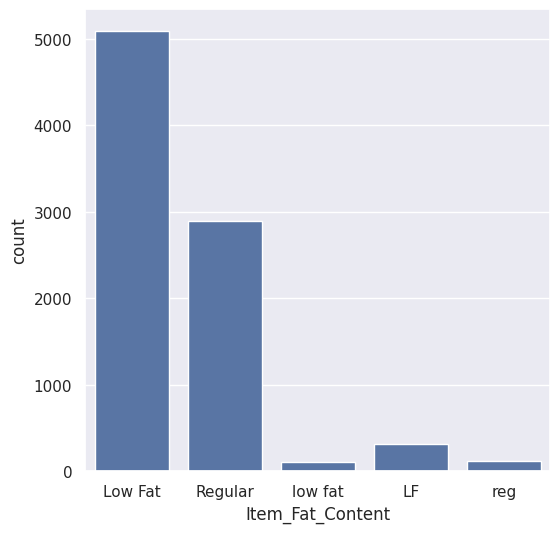

In [23]:
# item_MRP_dist
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data = big_mart_data)
plt.show()

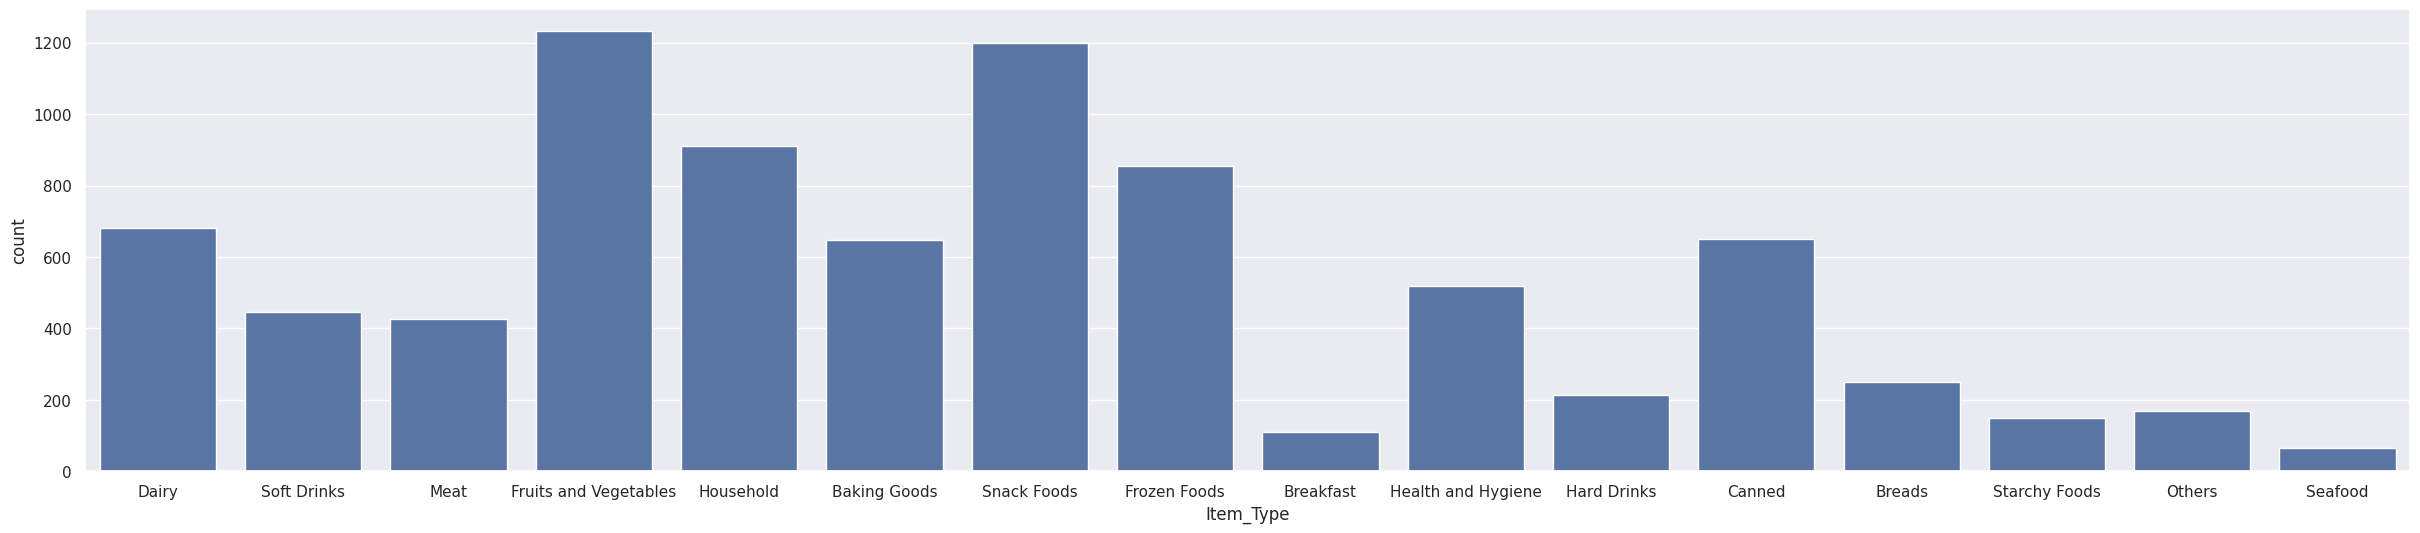

In [24]:
# item_MRP_dist
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data = big_mart_data)
plt.show()

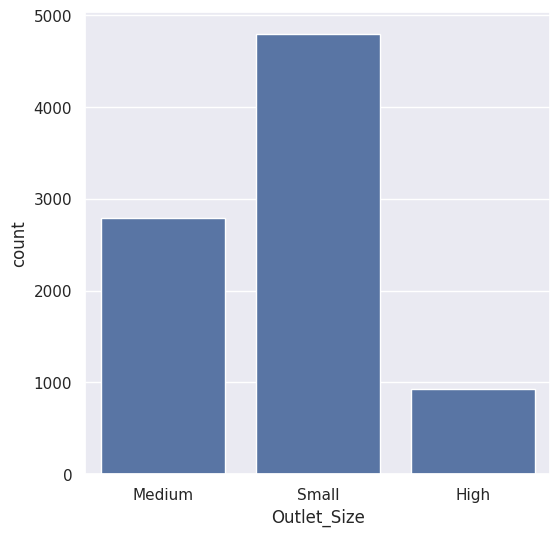

In [25]:
# item_MRP_dist
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data = big_mart_data)
plt.show()

Data Preprocessing

In [26]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
type(big_mart_data['Item_Fat_Content'][0])

str

In [28]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [29]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'}},inplace=True)

In [30]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

In [31]:
encoder = LabelEncoder()


In [32]:
big_mart_data['Item_Identifier'].value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [33]:
# big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
# big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
# big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
# big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
# big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
# big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
# big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])
encoders = {
    'Item_Identifier': LabelEncoder(),
    'Item_Fat_Content': LabelEncoder(),
    'Item_Type': LabelEncoder(),
    'Outlet_Identifier': LabelEncoder(),
    'Outlet_Size': LabelEncoder(),
    'Outlet_Location_Type': LabelEncoder(),
    'Outlet_Type': LabelEncoder()
}


In [34]:
for col, encoder in encoders.items():
    big_mart_data[col] = encoder.fit_transform(big_mart_data[col])

In [35]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting the data

In [36]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [37]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [38]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size =0.2,random_state=2)

In [39]:
print(X.shape , X_train.shape , X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model Training

In [40]:
regressor = XGBRegressor()

In [41]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [42]:
training_data_prediction = regressor.predict(X_train)

In [43]:
# R squared values
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [44]:
print('R squared value = ', r2_train)

R squared value =  0.8762174618111388


In [45]:
testing_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,testing_data_prediction)
print('R squared value = ', r2_test)

R squared value =  0.5017253991620692


<ipython-input-46-b1f324804a43>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_data_prediction)


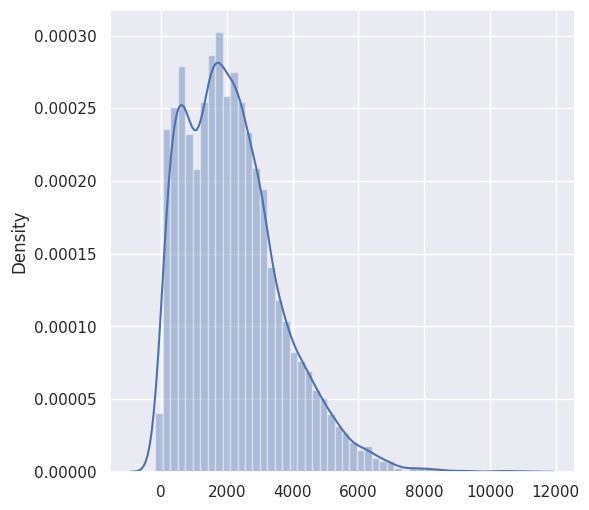

In [46]:
# item_MRP_dist
plt.figure(figsize=(6,6))
sns.distplot(training_data_prediction)
plt.show()

In [47]:
training_data_prediction_list = training_data_prediction.tolist()
Y_train_list = Y_train.tolist()
Y_train_list.sort()
training_data_prediction_list.sort()

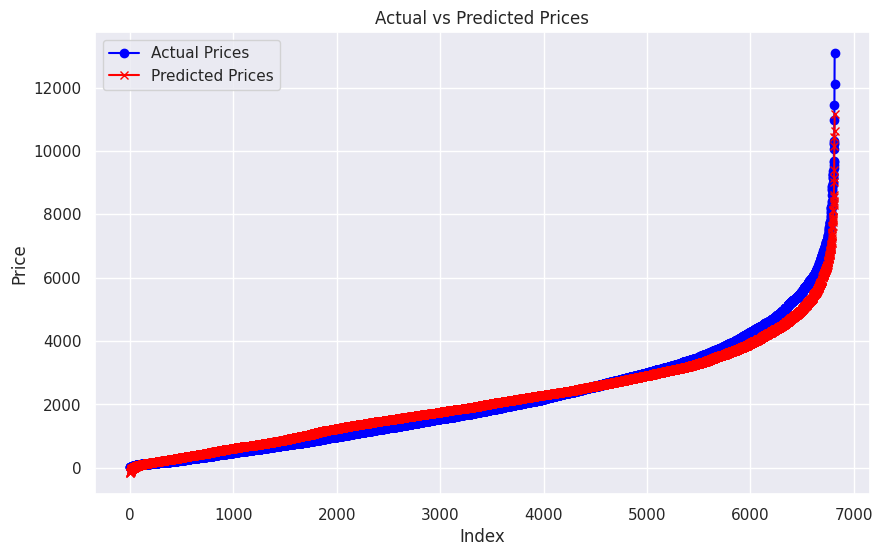

In [48]:
import matplotlib.pyplot as plt

# Example data
actual_prices = Y_train_list
predicted_prices = training_data_prediction_list

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', color='red')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()


In [49]:
testing_data_prediction_list = testing_data_prediction.tolist()
Y_test_list = Y_test.tolist()
Y_test_list.sort()
testing_data_prediction_list.sort()

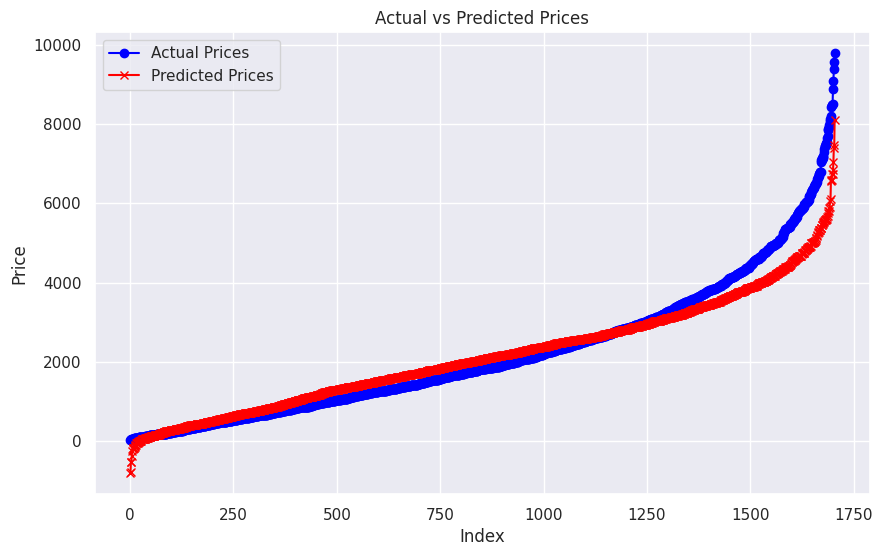

In [50]:
import matplotlib.pyplot as plt

# Example data
actual_prices = Y_test_list
predicted_prices = testing_data_prediction_list

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', color='red')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()


In [51]:
import pickle

In [52]:
with open('model.pkl', 'wb') as f:
    pickle.dump(regressor, f)

with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

Predictive System

In [78]:
input_data = ('FDG08',13.15,'Regular',0.165694678,'Fruits and Vegetables',171.8764,'OUT045',2002,'Medium','Tier 2','Supermarket Type1')

with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

encoded_data = list(input_data)
print(encoded_data)
columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for i, col in enumerate(columns):
    if col in encoders:
        encoded_data[i] = encoders[col].transform([encoded_data[i]])[0]
        print(encoded_data)

print( encoded_data)

encoded_data = np.array(encoded_data).reshape(1, -1)
prediction = model.predict(encoded_data)
print(prediction)

['FDG08', 13.15, 'Regular', 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 'Regular', 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 1]
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 1]
[3919.0674]


RandomForestRegressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
regressor2 = RandomForestRegressor(n_estimators = 500)

In [57]:
#training the model
regressor2.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

In [58]:
training_data_prediction = regressor2.predict(X_train)
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value = ', r2_train)

R squared value =  0.9401191006755821


In [59]:
testing_data_prediction = regressor2.predict(X_test)
r2_test = metrics.r2_score(Y_test,testing_data_prediction)
print('R squared value = ', r2_test)

R squared value =  0.5543616744835949


In [60]:
training_data_prediction_list = training_data_prediction.tolist()
Y_train_list = Y_train.tolist()
Y_train_list.sort()
training_data_prediction_list.sort()

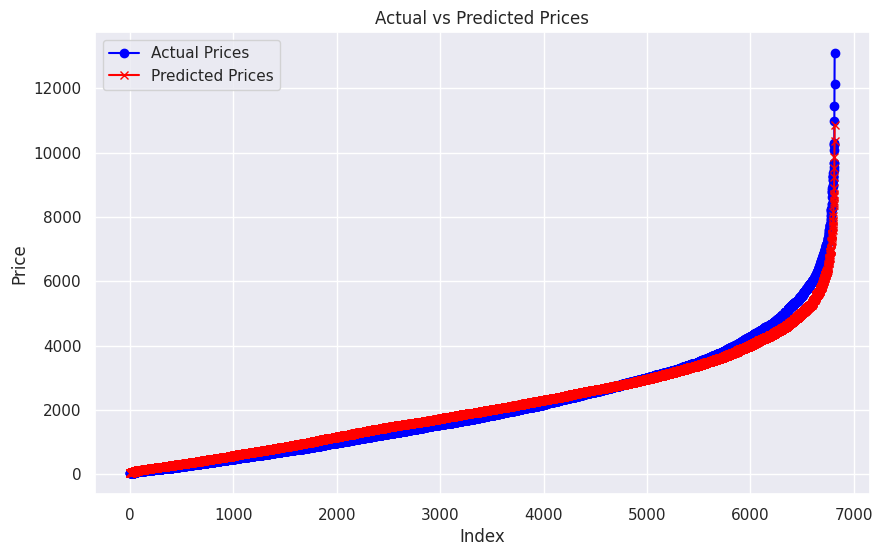

In [61]:
import matplotlib.pyplot as plt

# Example data
actual_prices = Y_train_list
predicted_prices = training_data_prediction_list

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', color='red')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()


In [62]:
testing_data_prediction_list = testing_data_prediction.tolist()
Y_test_list = Y_test.tolist()
Y_test_list.sort()
testing_data_prediction_list.sort()

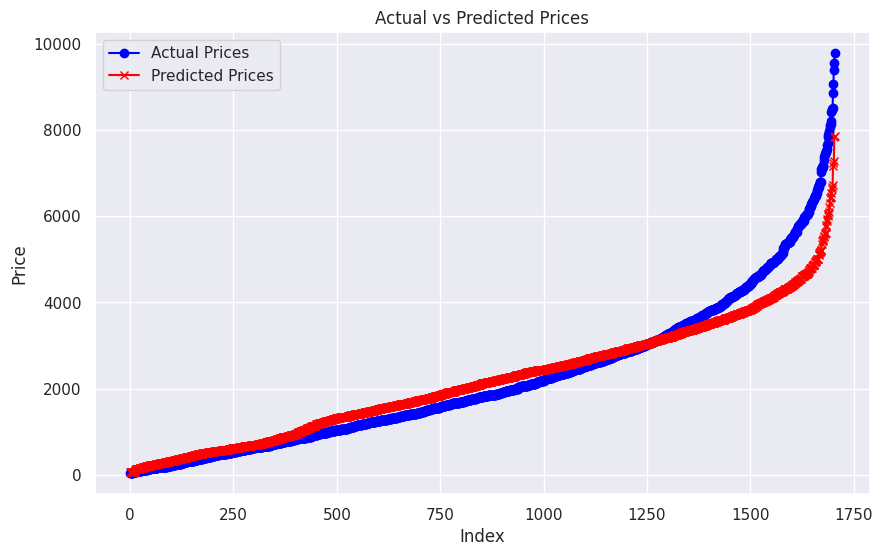

In [63]:
import matplotlib.pyplot as plt

# Example data
actual_prices = Y_test_list
predicted_prices = testing_data_prediction_list

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', color='red')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()


In [71]:
with open('model2.pkl', 'wb') as f:
    pickle.dump(regressor2, f)

In [79]:
input_data = ('FDG08',13.15,'Regular',0.165694678,'Fruits and Vegetables',171.8764,'OUT045',2002,'Medium','Tier 2','Supermarket Type1')

with open('model2.pkl', 'rb') as f:
    model = pickle.load(f)

with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

encoded_data = list(input_data)
print(encoded_data)
columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for i, col in enumerate(columns):
    if col in encoders:
        encoded_data[i] = encoders[col].transform([encoded_data[i]])[0]
        print(encoded_data)

print( encoded_data)

encoded_data = np.array(encoded_data).reshape(1, -1)
prediction = model.predict(encoded_data)
print(prediction)

['FDG08', 13.15, 'Regular', 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 'Regular', 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 1]
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 1]
[3535.0677632]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [64]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the model
modelx = DecisionTreeRegressor(random_state=42)
modelx.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [65]:
training_data_prediction = modelx.predict(X_train)
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value = ', r2_train)

R squared value =  1.0


In [66]:
testing_data_prediction = modelx.predict(X_test)
r2_test = metrics.r2_score(Y_test,testing_data_prediction)
print('R squared value = ', r2_test)

R squared value =  0.1678193312040005


In [67]:
training_data_prediction_list = training_data_prediction.tolist()
training_data_prediction_list.sort()
Y_train_list = Y_train.tolist()
Y_train_list.sort()

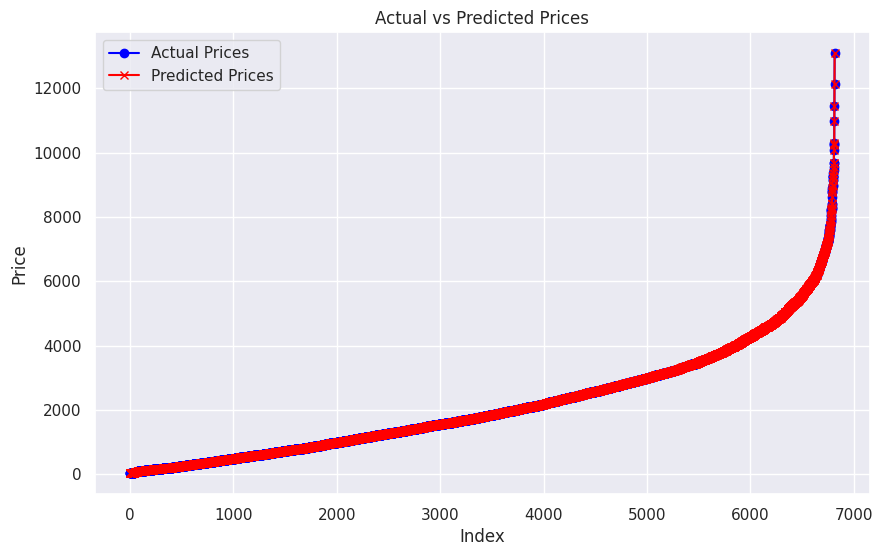

In [68]:
import matplotlib.pyplot as plt

# Example data
actual_prices = Y_train_list
predicted_prices = training_data_prediction_list

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', color='red')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()

In [69]:
testing_data_prediction_list = testing_data_prediction.tolist()
Y_test_list = Y_test.tolist()
Y_test_list.sort()
testing_data_prediction_list.sort()

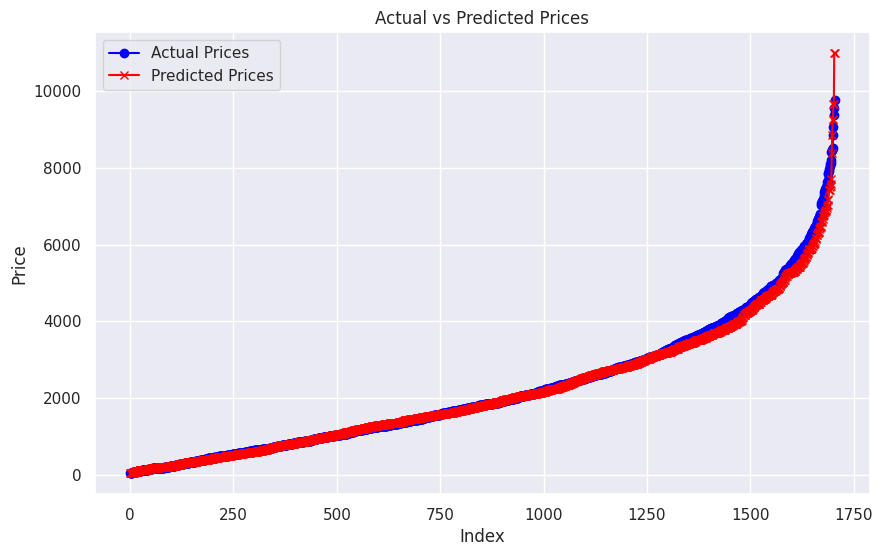

In [70]:
import matplotlib.pyplot as plt

# Example data
actual_prices = Y_test_list
predicted_prices = testing_data_prediction_list

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Prices', marker='o', color='blue')
plt.plot(predicted_prices, label='Predicted Prices', marker='x', color='red')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()

# Display the plot
plt.show()


In [73]:
with open('model3.pkl', 'wb') as f:
    pickle.dump(modelx, f)

In [80]:
input_data = ('FDG08',13.15,'Regular',0.165694678,'Fruits and Vegetables',171.8764,'OUT045',2002,'Medium','Tier 2','Supermarket Type1')

with open('model3.pkl', 'rb') as f:
    model = pickle.load(f)

with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

encoded_data = list(input_data)
print(encoded_data)
columns = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

for i, col in enumerate(columns):
    if col in encoders:
        encoded_data[i] = encoders[col].transform([encoded_data[i]])[0]
        print(encoded_data)

print( encoded_data)

encoded_data = np.array(encoded_data).reshape(1, -1)
prediction = model.predict(encoded_data)
print(prediction)

['FDG08', 13.15, 'Regular', 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 'Regular', 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 'Fruits and Vegetables', 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 'OUT045', 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 'Medium', 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 'Tier 2', 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 'Supermarket Type1']
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 1]
[397, 13.15, 1, 0.165694678, 6, 171.8764, 7, 2002, 1, 1, 1]
[3779.0808]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
